$$
\text{Standard MVO: }
$$

$$
max(w'\alpha - \lambda w' \Sigma w)
$$

$$
\text{Robust MVO wth an ellipsoidal uncertainty set about $\alpha$}:
$$

$$
max(min(w' \mu) - \lambda w' \Sigma w) \ s.t. (\mu - \alpha)' \Lambda (\mu - \alpha) \leq \kappa
$$

$$
\text{This resembles an adversarial dual optimization problem where we attempt to maximize the worst-case $\alpha$}
$$

$$
min(w' \mu + \gamma ((\mu - \alpha)' \Lambda (\mu - \alpha) - \kappa))
$$

$$
FOC = w + 2 * \gamma * \Lambda (\mu - \alpha) = 0
$$

$$
- w = 2 * \gamma * \Lambda (\mu - \alpha) = 0
$$

$$
-\frac{1}{2 * \gamma} \Lambda^{-1} w =   - \alpha
$$

$$
\mu = \alpha - \frac{1}{2 * \gamma} \Lambda^{-1} w
$$

$$
\gamma = \frac{\sqrt{w' \Lambda^{-1} w}}{2 \kappa}
$$

$$
\mu = \alpha - \kappa \frac{\Lambda^{-1} w}{\sqrt{w' \Lambda^{-1} w}}
$$

$$
\text{Now that we have solved the inner minimization problem, let's solve the outer maximization problem: }
$$

$$
max(w' \mu - \lambda w' \Sigma w)
$$

$$
= max(w' (\alpha - \kappa \frac{\Lambda^{-1} w}{\sqrt{w' \Lambda^{-1} w}}) - \lambda w' \Sigma w)
$$

$$
= max(w' \alpha - \kappa \frac{w' \Lambda^{-1} w}{\sqrt{w' \Lambda^{-1} w}} - \lambda w' \Sigma w)
$$

$$
= max(w' \alpha - \kappa \sqrt{w' \Lambda^{-1} w} - \lambda w' \Sigma w)
$$

$$
FOC = \alpha - 2 \kappa \Lambda^{-1} w - \lambda \Sigma w
$$

$$
\alpha = \kappa \Lambda^{-1} w + \lambda \Sigma w
$$

$$
\alpha = (\kappa \Lambda^{-1} + \lambda \Sigma) w
$$

$$
w = (\kappa \Lambda^{-1} + \lambda \Sigma)^{-1} \alpha
$$

$$
\text{This is a familiar sight... the solution here closely relates to L2 Ridge/Tikhonov regression... as you can see, we simply add a PSD matrix to the covariance matrix as a regularization term. Additionally, if we applied a non-zero prior to the coefficients/weights, then we'd converge to a solution proportonal to the following:} 
$$

$$
w = (\kappa \Lambda^{-1} + \lambda \Sigma)^{-1} (\alpha + \kappa \Lambda w_{prior})
$$

$$
\text{whose solution directly mirrors that of the Tikhonov regression where we penalize the traditional least-squares objective with: }
$$

$$
\kappa (\beta - \beta_{prior})' \Lambda (\beta - \beta_{prior})
$$


In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def solve_unconstrained_mvo(alpha: np.ndarray, sigma: np.ndarray) -> np.ndarray: 
    return np.linalg.inv(sigma) @ alpha


def solve_robust_mvo(alpha: np.ndarray, sigma: np.ndarray, omega: np.ndarray, kappa: float, lambd: float) -> np.ndarray: 
    return np.linalg.inv(kappa * np.linalg.inv(omega) + lambd * sigma) @ alpha


alpha: np.ndarray = np.random.standard_normal(size=(100, 1))
returns: np.ndarray = np.random.standard_normal(size=(10_000, 100))
sigma: np.ndarray = returns.T @ returns
omega: np.ndarray = np.diag(np.random.standard_normal(size=100))
kappa: float = 10
lambd: float = 10

unconstrained_weights: np.ndarray = solve_unconstrained_mvo(alpha=alpha, sigma=sigma)
robust_weights: np.ndarray = solve_robust_mvo(alpha=alpha, sigma=sigma, omega=omega, kappa=kappa, lambd=lambd)

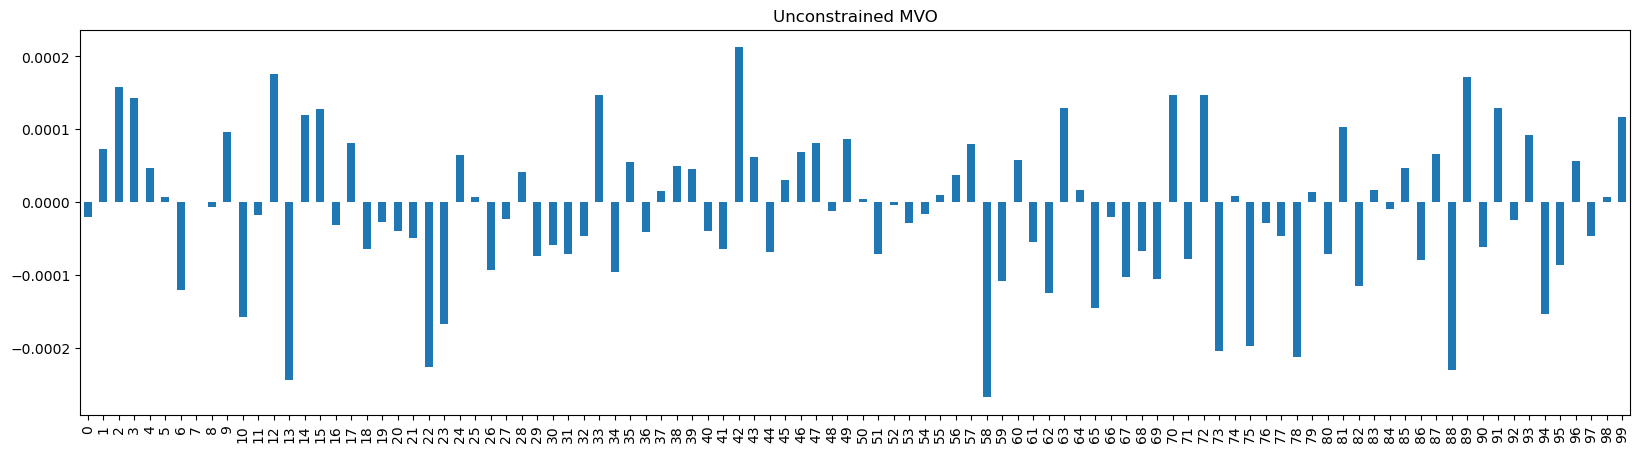

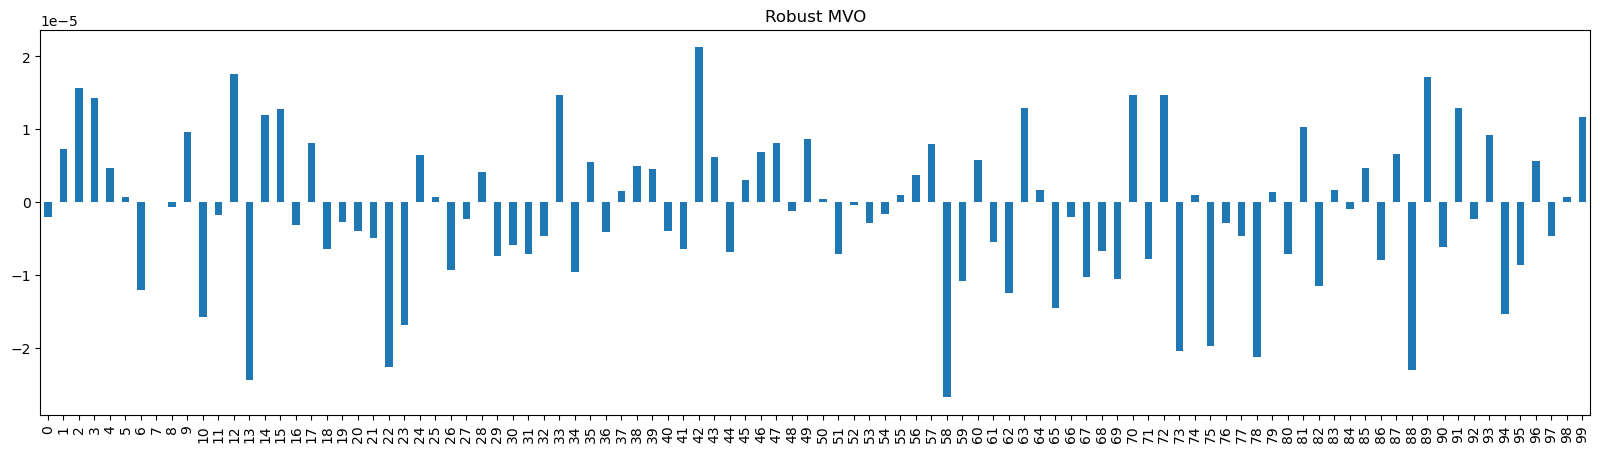

In [19]:
pd.Series(unconstrained_weights.reshape(-1)).plot(kind="bar", figsize=(20, 5), title="Unconstrained MVO")
plt.show()

pd.Series(robust_weights.reshape(-1)).plot(kind="bar", figsize=(20, 5), title="Robust MVO")
plt.show()